In [ ]:
# import numpy as np
# import pandas as pd
# import scipy
# import sklearn
# import spacy
# import matplotlib.pyplot as plt
# import seaborn as sns

# import re
# from collections import Counter

# from time import time
# %matplotlib inline

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import seaborn as sns
import nltk
sns.set_style("whitegrid")
# import altair as alt
# alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 4000

In [120]:
# df_path = "/home/lnc/0. Latest News Classifier/01. Dataset Creation/"
df_path = 'data/'
df_temp1 = pd.read_csv(df_path + 'articles1.csv')
df_temp2 = pd.read_csv(df_path + 'articles2.csv')
df_temp3 = pd.read_csv(df_path + 'articles3.csv')

df_temp = df_temp1.append(df_temp2).append(df_temp3)

In [121]:
df = df_temp.set_index('id')[['title','publication', 'year', 'content']]
df['content_len'] = df['content'].apply(len)

In [103]:
df.shape

(142570, 5)

In [63]:
pd.options.display.max_rows = 4000

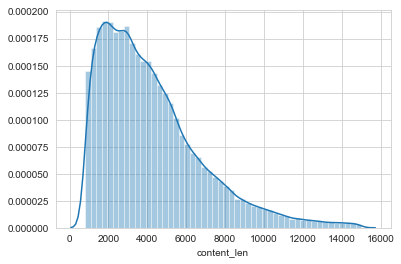

In [122]:
sns.distplot(df.loc[df.content_len.between(800, 15000),'content_len'], bins=50)

plt.show()

In [123]:
import matplotlib.pyplot as plt

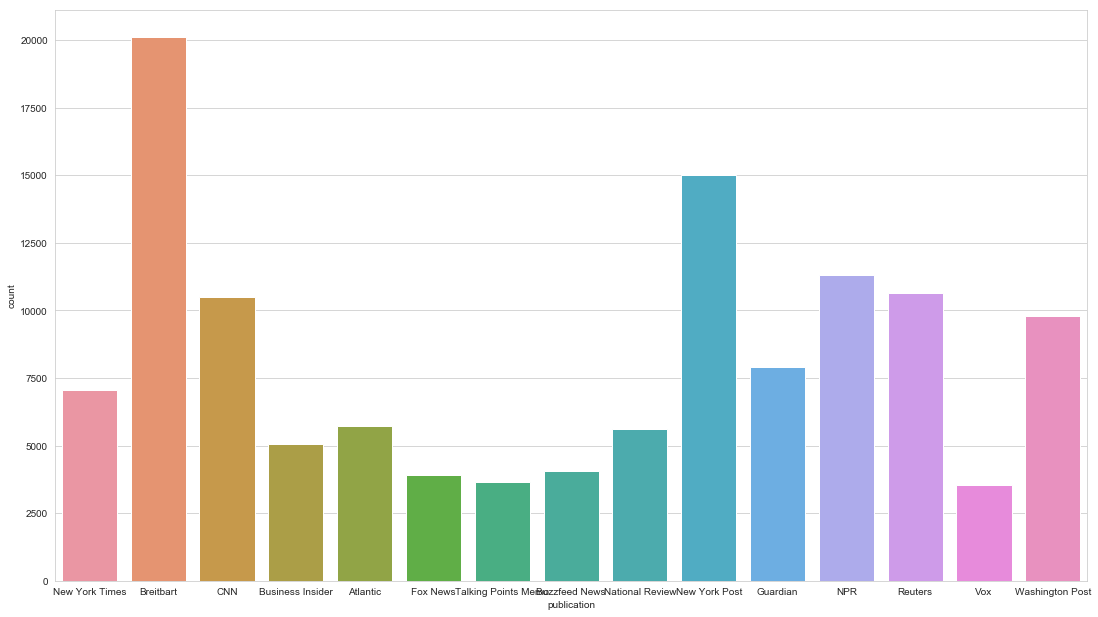

In [125]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="publication", data=df.loc[df.content_len.between(1000, 10000)])
plt.show()

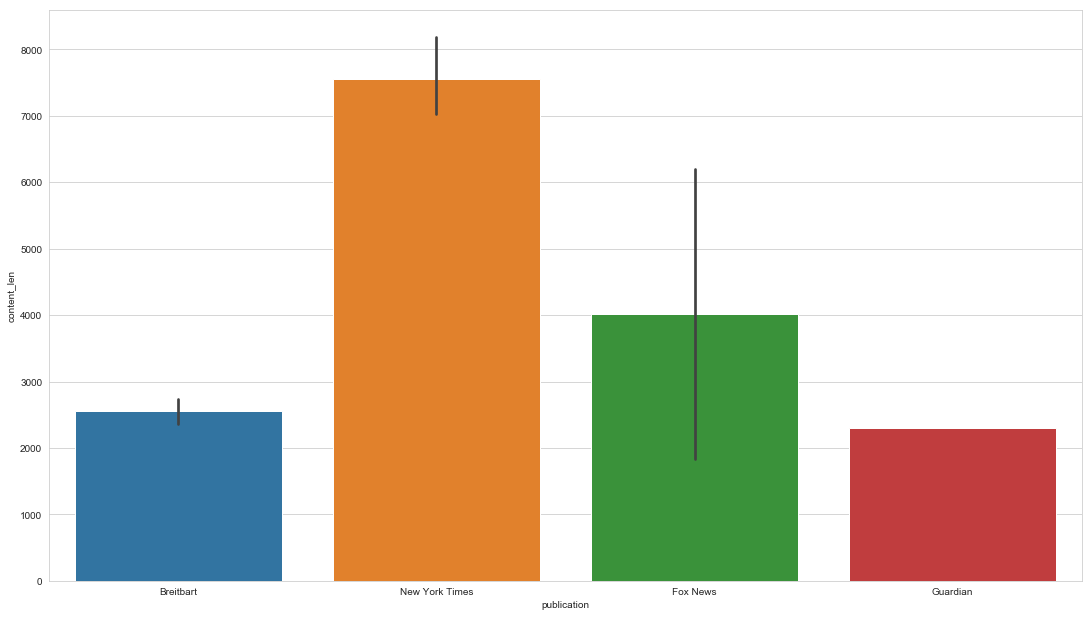

In [124]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_2.loc[df_2.content_len])
plt.show()

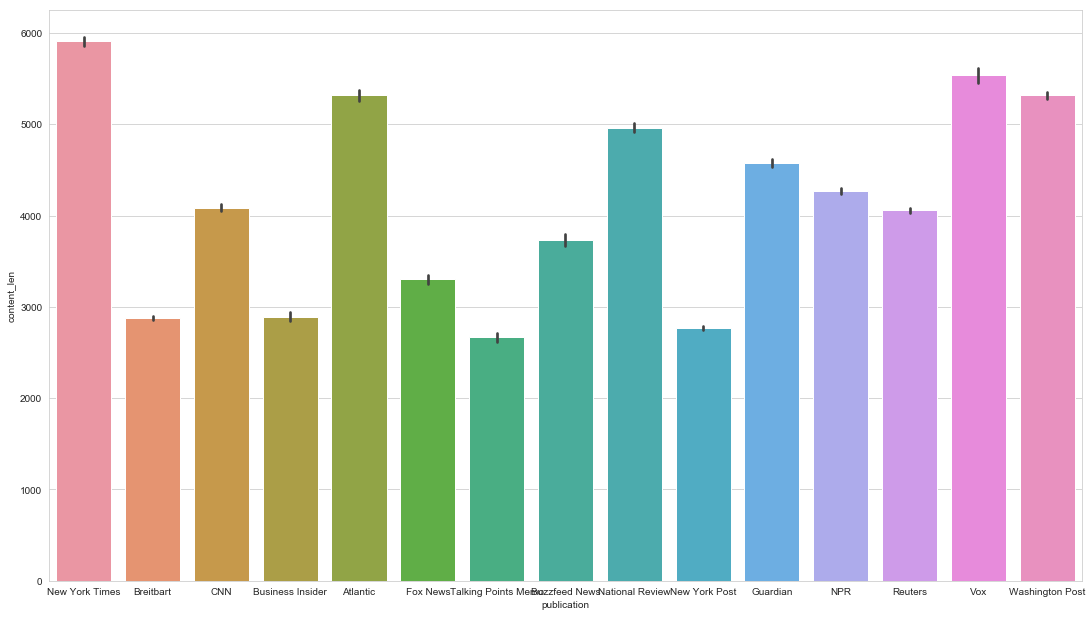

In [84]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df.loc[df.content_len.between(1000, 10000)])
plt.show()

In [156]:
df_2 = df.loc[df.publication.isin(['CNN','Breitbart','Fox News', 'Buzzfeed News', 'Guardian', 'NPR'])].drop_duplicates()

In [157]:
df_2.shape

(64975, 5)

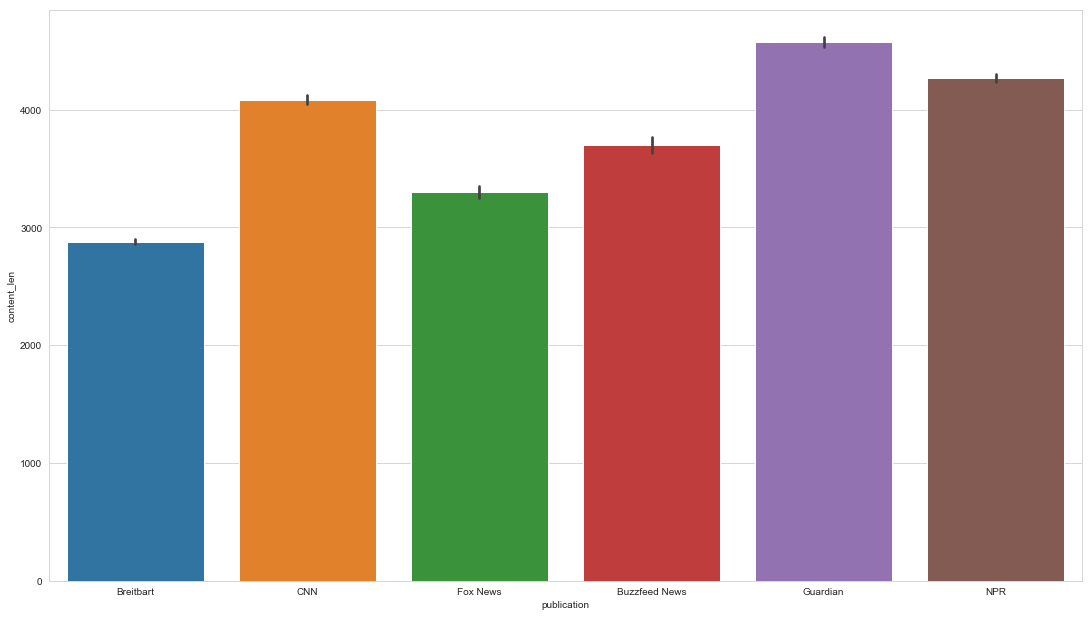

In [158]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_2.loc[df_2.content_len.between(1000, 10000)])
plt.show()

In [159]:
df_2.head()

,title,publication,year,content,content_len
id,,,,,
26539,CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...,Breitbart,2017.0,On Tuesday’s broadcast of CNN’s “Situation Roo...,1067
26540,American Students on Spring Break Chant ’Build...,Breitbart,2017.0,A group of American spring break revelers repo...,1514
26541,Surge in ’Honour Crimes’ and Forced Marriages ...,Breitbart,2017.0,“honour crimes” have risen by 40 per cent in...,2195
26542,MILO Announces New Media Venture - Breitbart,Breitbart,2017.0,Former Breitbart Senior Editor MILO has announ...,2113
26543,Jared Kushner at Center of Media Spotlight on ...,Breitbart,2017.0,The focus of the continuous media reports of a...,3866


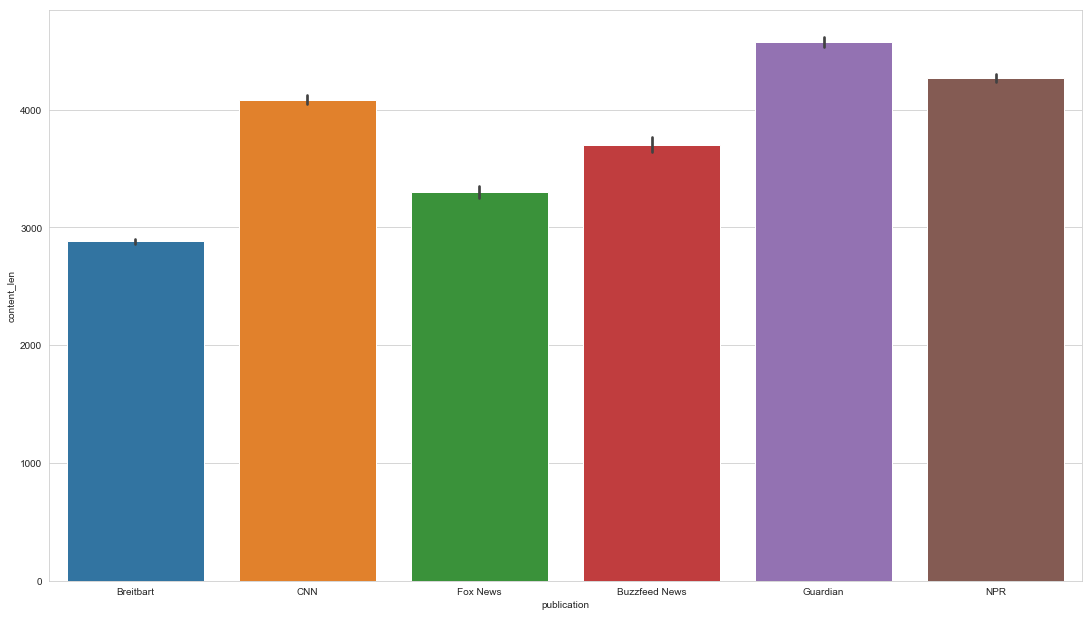

In [160]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_2.loc[df_2.content_len.between(1000, 10000)])
plt.show()

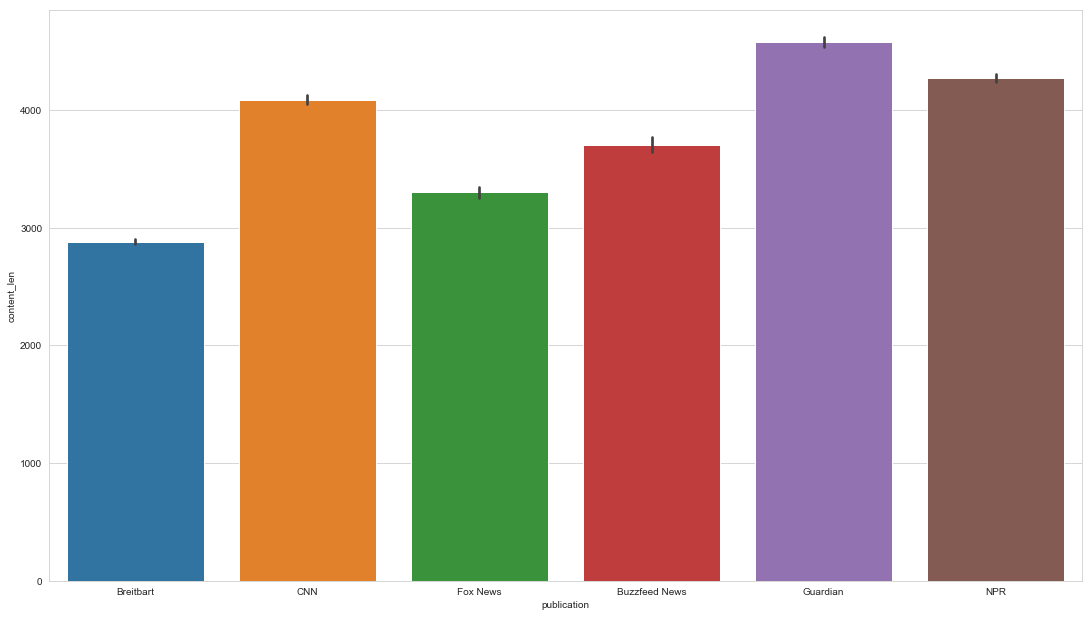

In [161]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_2.loc[df_2.content_len.between(1000, 10000)])
plt.show()

In [162]:
df_3 = df_2.loc[df_2.content_len.between(2000, 3200)].groupby('publication').apply(lambda x: x.sample(1000))

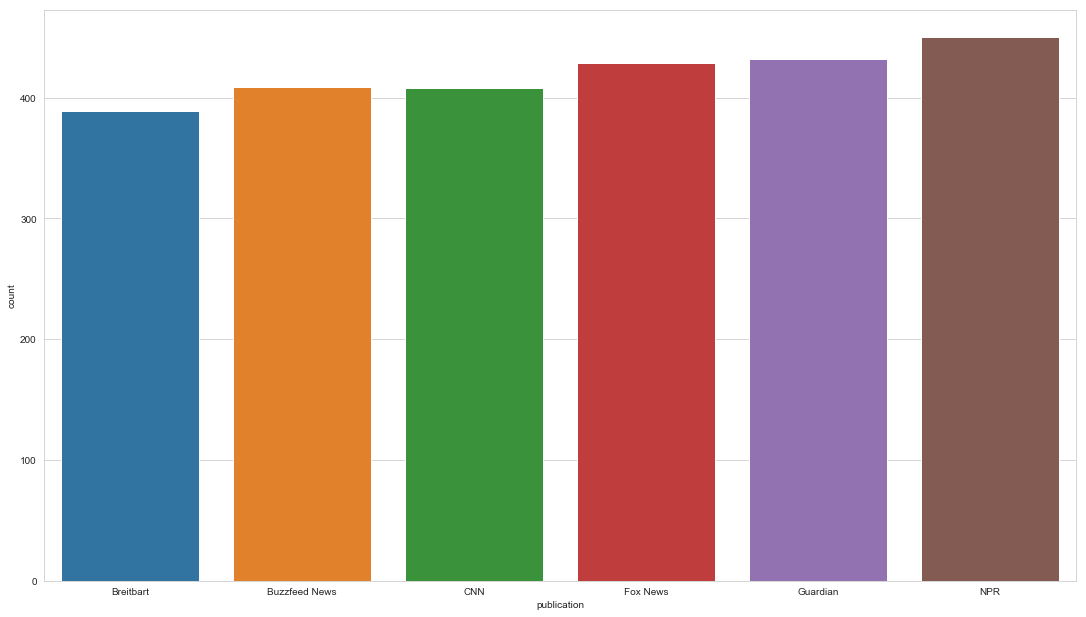

In [163]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="publication", data=df_3.loc[df_3.content_len.between(2500, 3000)])
plt.show()

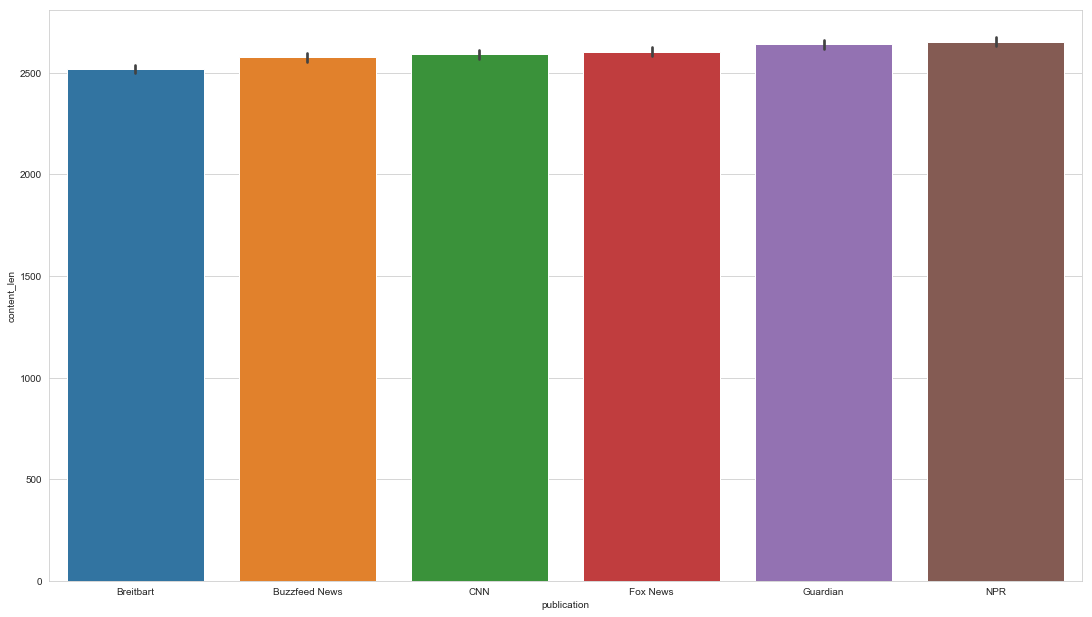

In [166]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.barplot(x="publication", y="content_len", data=df_3)
plt.show()

In [168]:
df_3.head()

title  \
publication id                                                         
Breitbart   29141  GOP House Majority Whip Scalise on Forgoing Au...   
            38328  Megan Rapinoe Stands for Thailand Anthem Befor...   
            29992  Trump Administration Solicits Border Wall Prop...   
            46302        Mark Levin: Trump the Globalist - Breitbart   
            26688  Laptop with Trump Tower Floor Plans, National ...   

                  publication    year  \
publication id                          
Breitbart   29141   Breitbart  2017.0   
            38328   Breitbart  2016.0   
            29992   Breitbart  2017.0   
            46302   Breitbart  2016.0   
            26688   Breitbart  2017.0   

                                                             content  \
publication id                                                         
Breitbart   29141  On Sunday’s broadcast of Fox News Channel’s “S...   
            38328  Megan Rapinoe knelt for “The Star Spangled Ban...   
            29992  The Department of Homeland Security wants comp...   
            46302  Mark Levin writes at Conservative Review:  One...   
            26688  The New York Daily News cited police sources o...   

                   content_len  
publication id                  
Breitbart   29141         2034  
            38328         2704  
            29992         2890  
            46302         2150  
            26688         2699

In [171]:
df_3.to_csv('cleanish_data.csv')